# Evalution Project Global Power Plant DataBase

## Name: Ajit A Gouda


## Batch:DS2311

## Problem Statement

##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

#### The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
-commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

### Prediction :
Make two prediction 1) Primary Fuel 2) capacity_mw

Downlaod Files:

https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [115]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [3]:
df=pd.read_csv('power_plant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### As we see that there many Missing values 

In [5]:
df.isin([' ','NA','-','?']).sum().any()

False

#### hence there is no white space, Na,_,? in the data set

In [6]:
df.duplicated().sum() 

0

Upon initial inspection of the CSV file's header, it is evident that significant data cleaning is necessary before Exploratory Data Analysis (EDA) and Machine Learning (ML) modeling can be undertaken. The following observations are noteworthy:

- Missing Data: A substantial number of data points are missing within specific columns.
- Irrelevant Data: Certain columns, such as "gppd_idnr" and "url", contain data irrelevant to the analysis.

Data cleaning will be essential to prepare the data for further analysis. Subsequently, feature engineering techniques may be employed to modify and enhance the remaining columns.

Our data cleaning process will focus on the elimination of columns containing missing values that are deemed irrelevant to the analysis.

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data','gppd_idnr','owner','other_fuel3','other_fuel2','estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [8]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority


#### We will see that what percentage of data is missing in the dataset

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


#### Filling Null values

In [10]:
df['generation_gwh_2013'].fillna(value=df['generation_gwh_2013'].median(), inplace= True)
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)

In [11]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
geolocation_source                  19        2.094818
source                               0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
generation_gwh_2014                  0        0.000000
generation_gwh_2015                  0        0.000000
generation_gwh_2016                  0        0.000000
generation_gwh_2017                  0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
name                                 0        0.000000


In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,907.000000,907.000000,907.000000,907.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,NaN,1516.689956,1510.071296,1565.361383,1657.121797,2600.804099,NaN
std,590.085456,6.079148,4.812291,17.082868,NaN,2785.604307,2984.994556,3005.087210,3046.862910,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,801.123775,711.181225,737.205450,817.977250,193.378250,NaN
50%,59.200000,21.281800,76.979200,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,801.123775,711.181225,737.205450,817.977250,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


- Largest Power Plant: The dataset contains a power plant with the highest generation capacity of 4,760 megawatts (MW).
- Distribution of Generation: The mean value in the "Generation-GWHours" columns exceeds the median, suggesting a positive skew towards higher generation values.
- Geographic Distribution: Power plants are geographically dispersed across a latitude range of 8.1689 degrees to 34.6490 degrees and a longitude range of 68.64 degrees to 95.4080 degrees.
- Plant Age Distribution: The dataset encompasses power plants commissioned from as early as 1927 to as recent as 2018. Further analysis will determine the period with the most significant power plant commissioning activity.
- Predominance of Smaller Plants: The median capacity of power plants is 60 MW, indicating a prevalence of smaller capacity facilities within the dataset.

In [14]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


#### The dataset identifies the Vindhyachal Super Thermal Power Station (VINDH_CHAL STPS) as the largest power plant in India with a generation capacity of 4,760 megawatts (MW).

In [15]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN,NaN


#### The dataset appears to contain a potential data entry error. The Tata BP - Electronics City Solar Panel Plant is listed as the smallest plant with a capacity of 0 MW. A power plant in operation is unlikely to have zero generation capacity.

<Axes: ylabel='count'>

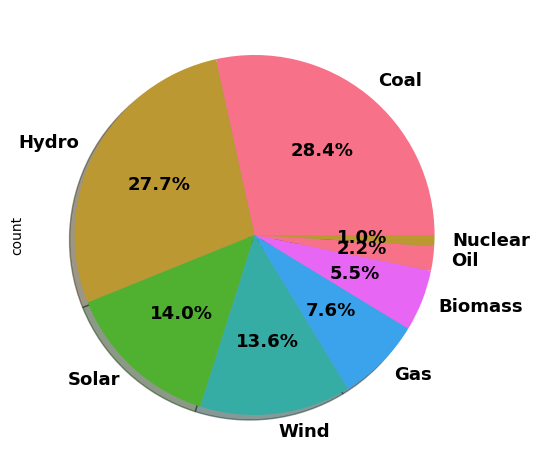

In [16]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)

Analysis of the power plant types reveals the following distribution:

- Predominant Coal Plants: Coal-based power plants constitute the largest category within the dataset.
- Hydropower Presence: Hydroelectric power plants represent the second-most prevalent type.
- Unconventional Power Plants: Approximately 40% of the power plants utilize unconventional sources, likely referring to non-renewable resources other than coal.
- Limited Nuclear Plants: The dataset includes a relatively small number of nuclear power plants, totaling only nine. 

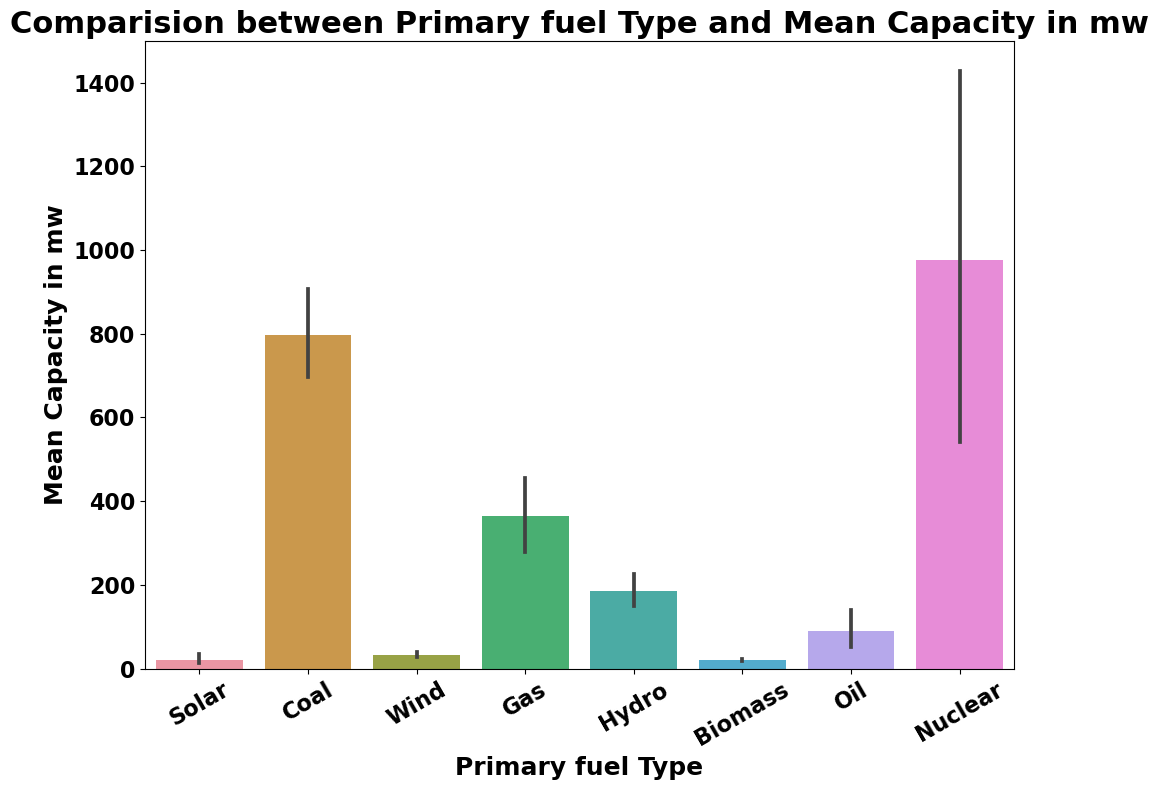

In [17]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

#### While the observation that the mean capacity of nuclear power plants is likely higher due to their limited number holds merit, it's important to consider alternative interpretations.

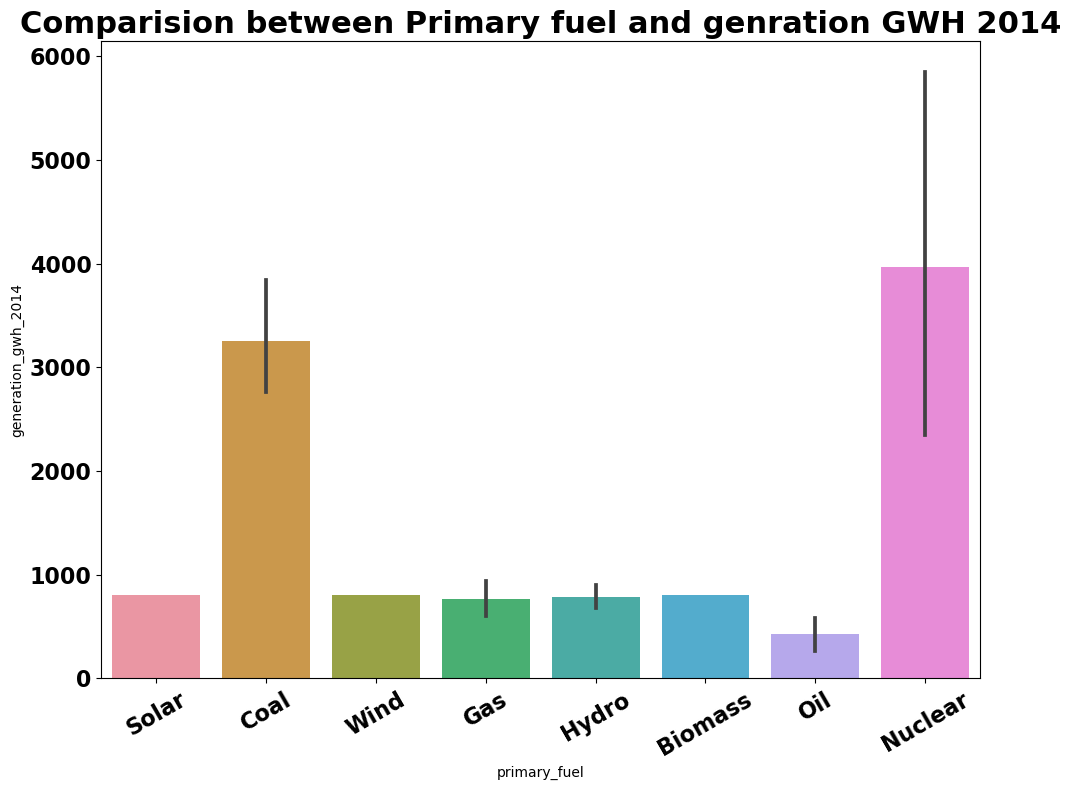

In [21]:
plt.figure(figsize = (10,8))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)
plt.title('Comparision between Primary fuel and genration GWH 2014', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

#### Data from 2014 indicates that a specific nuclear power plant held the top spot for electricity generation.

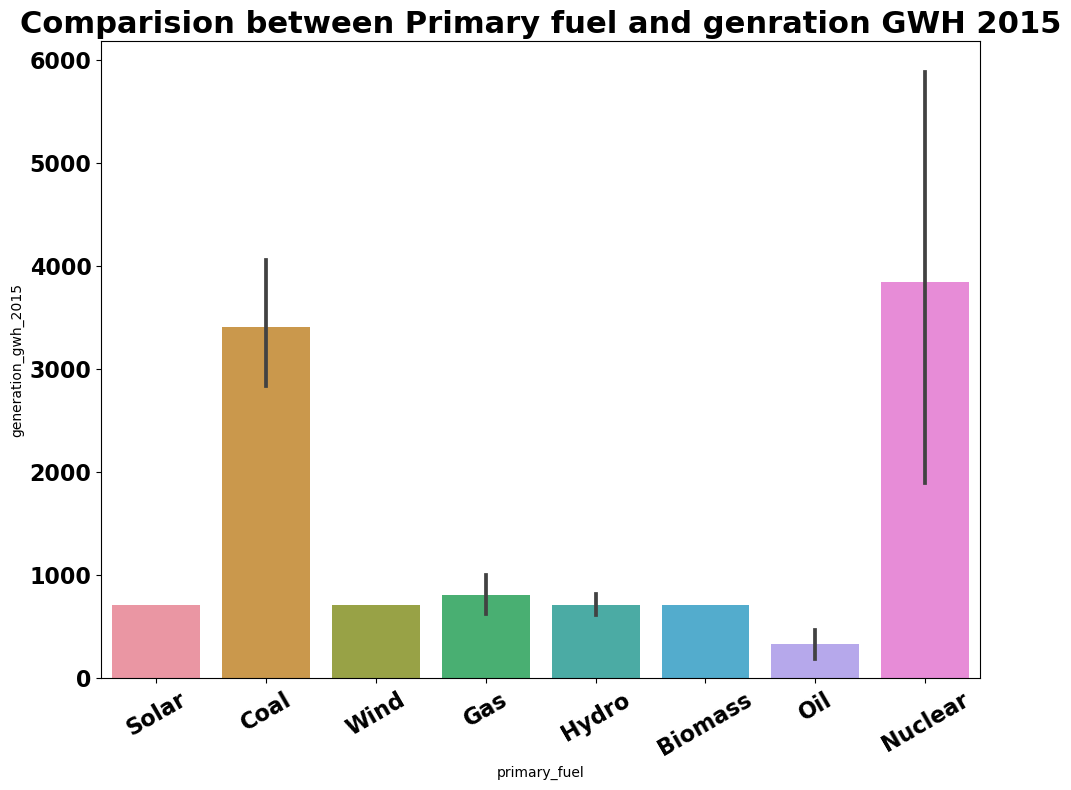

In [22]:
plt.figure(figsize = (10,8))
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)
plt.title('Comparision between Primary fuel and genration GWH 2015', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

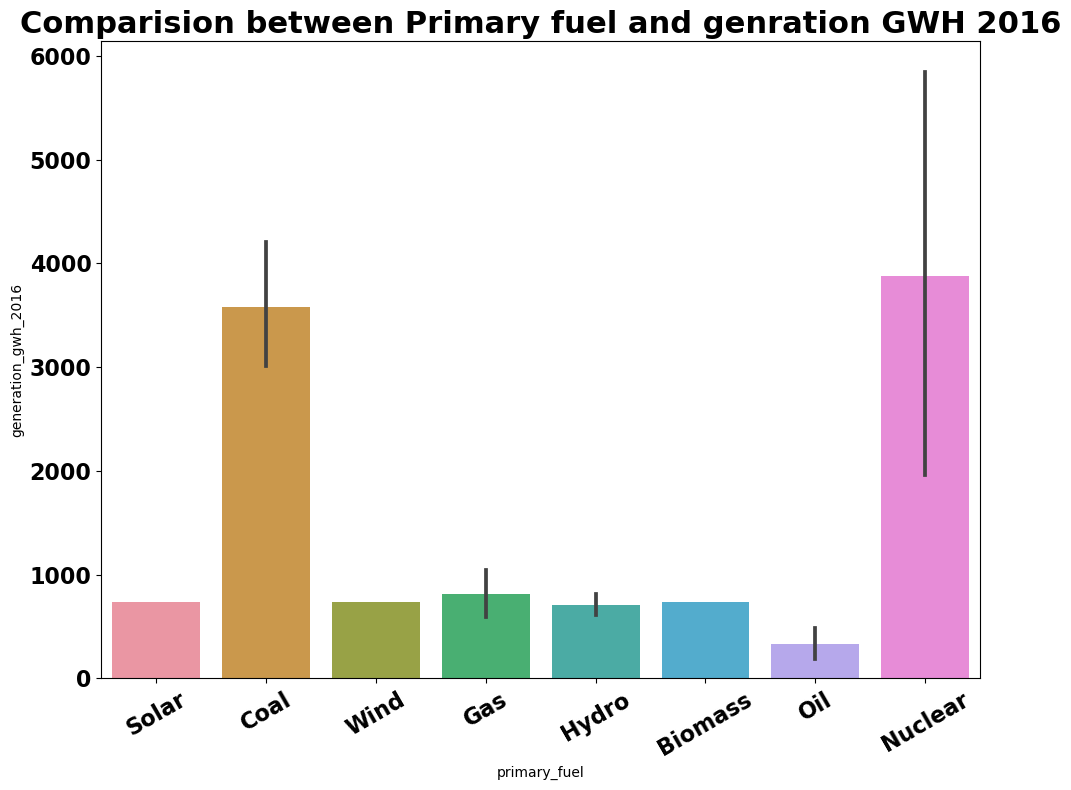

In [23]:
plt.figure(figsize = (10,8))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)
plt.title('Comparision between Primary fuel and genration GWH 2016', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

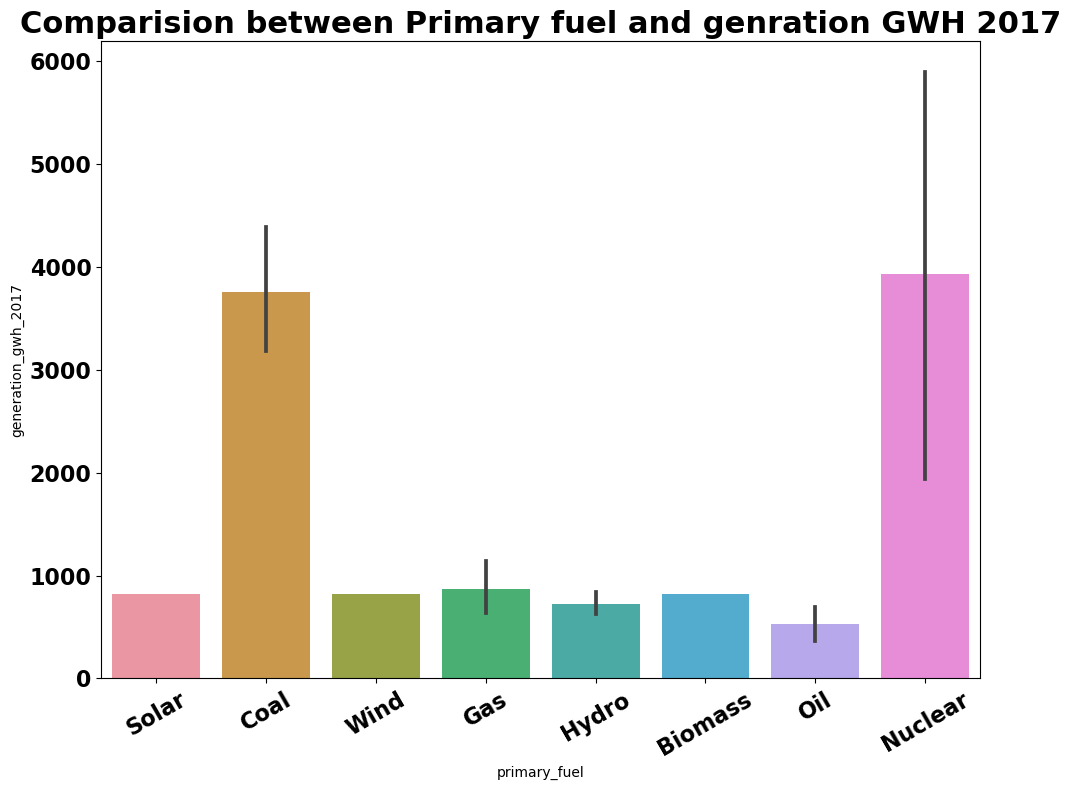

In [24]:
plt.figure(figsize = (10,8))
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)
plt.title('Comparision between Primary fuel and genration GWH 2017', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

#### An examination of the graph reveals that nuclear power consistently exhibits the highest average electricity generation across all years, followed by coal. This trend can likely be attributed to the superior efficiency of nuclear power plants.  The contribution of other fuel types to overall power generation appears to be significantly lower.

### Lets check how the primary fuel is related to lattitude and longitude

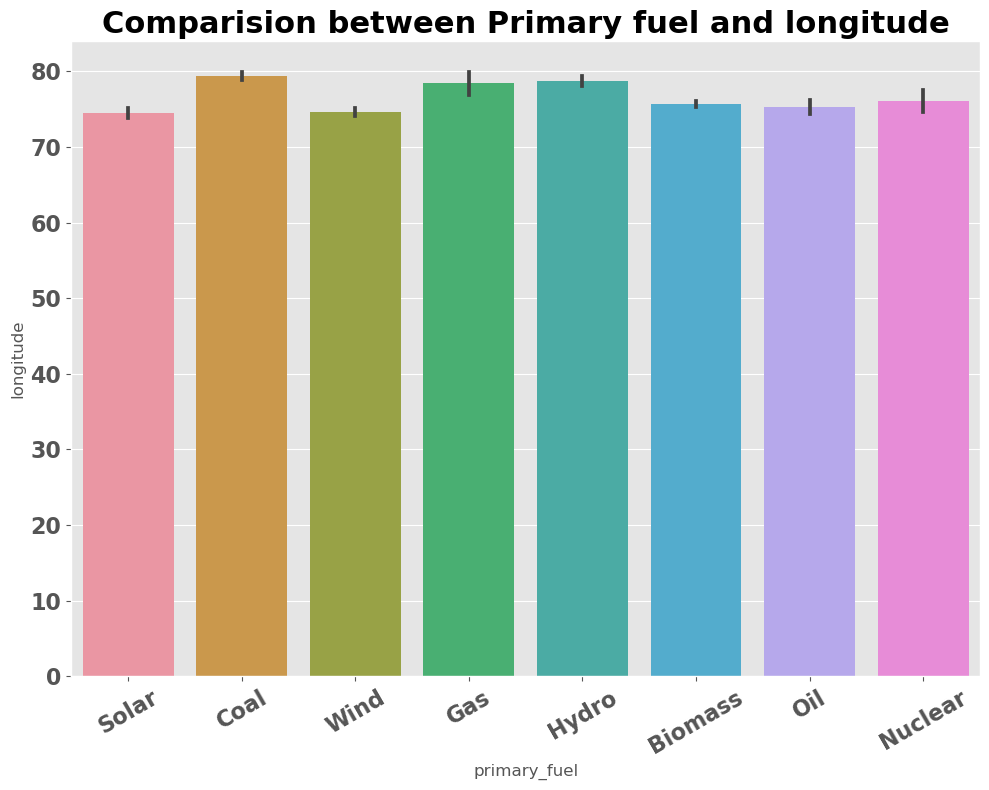

In [27]:
plt.figure(figsize = (10,8))
sns.barplot(x='primary_fuel',y='longitude',data=df)
plt.title('Comparision between Primary fuel and longitude', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

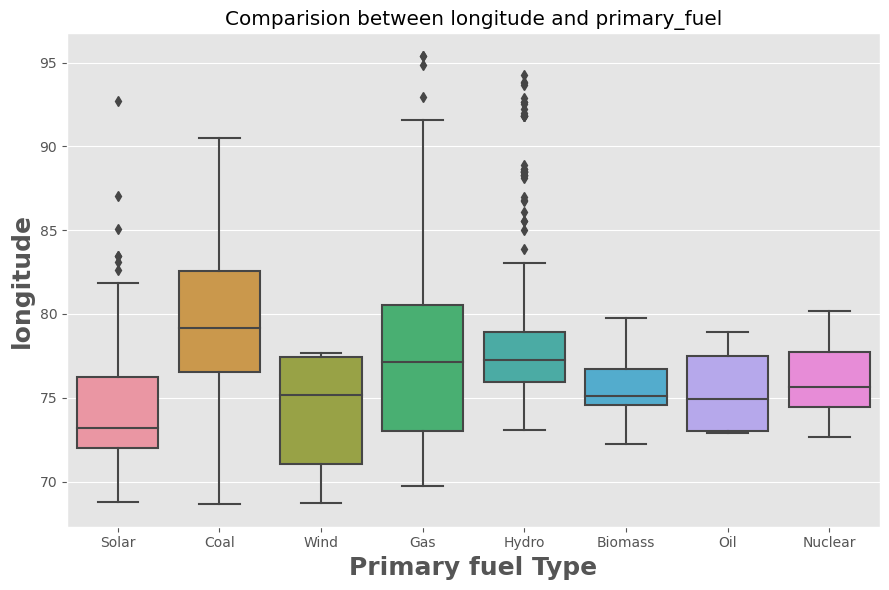

In [29]:
plt.figure(figsize=[9,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y='longitude',data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

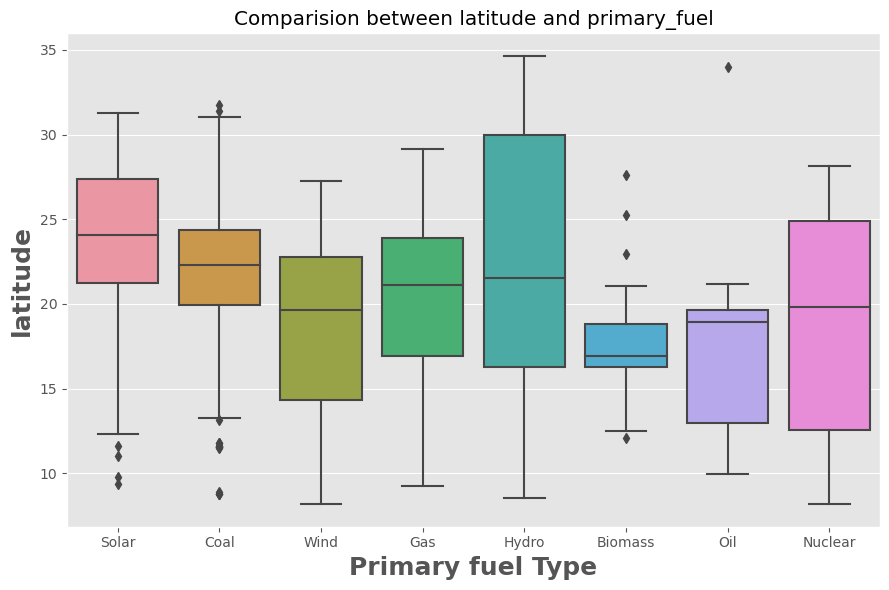

In [31]:
plt.figure(figsize=[9,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y='latitude',data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

#### Site selection is a critical factor, particularly for nuclear power plants.  These facilities are often situated within a specific geographic band, ranging in latitude from 15 to 25 degrees and longitude from 75 to 88 degrees.  Similarly, the distribution of solar power plants demonstrates a preference for particular latitude and longitude ranges.  This propensity is likely driven by the need for clear and intense sunlight with minimal humidity.

### Commission age vs primary fuel

In [32]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

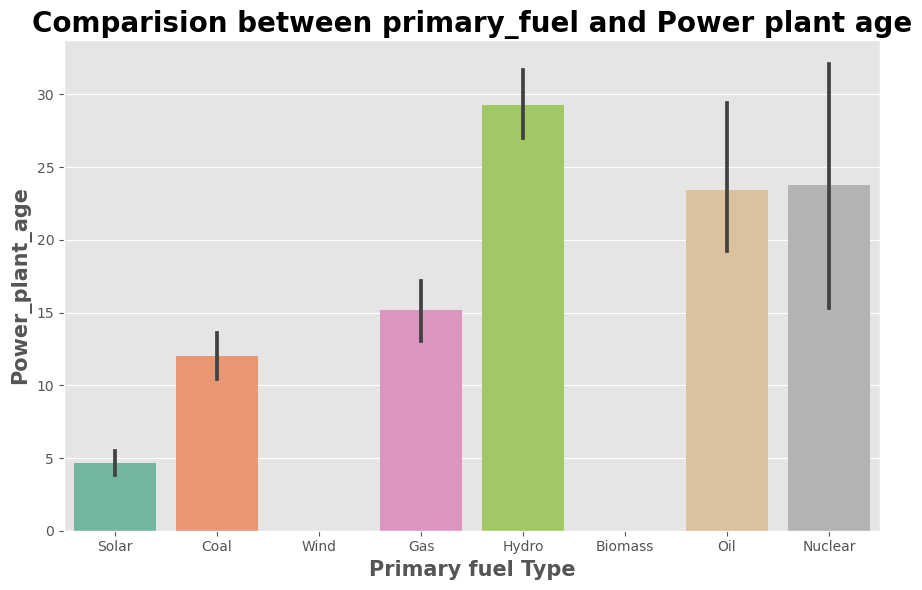

In [34]:
plt.figure(figsize = (9,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=20, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=15,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=15,fontweight ='bold')
plt.show()

#### A review of the hydropower industry indicates an aging infrastructure, with many plants in operation for extended periods.

### Let's investigate the potential influence of a power plant's capacity on its siting decisions.

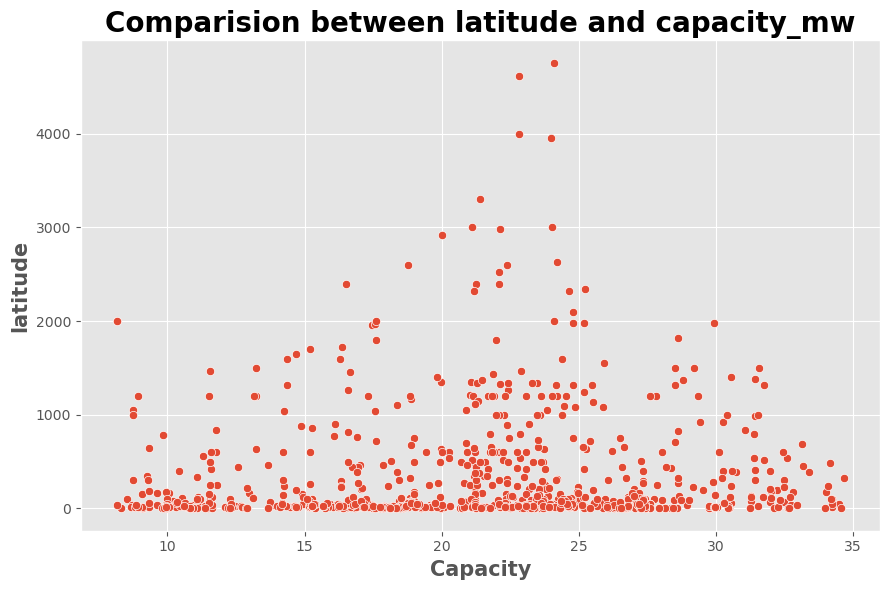

In [40]:
plt.figure(figsize=[9,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=20, fontweight='bold')
a= sns.scatterplot(x="latitude",y="capacity_mw",data=df)
a.set_xlabel('Capacity',fontsize=15,fontweight ='bold')
a.set_ylabel('latitude',fontsize=15,fontweight ='bold')
plt.show()

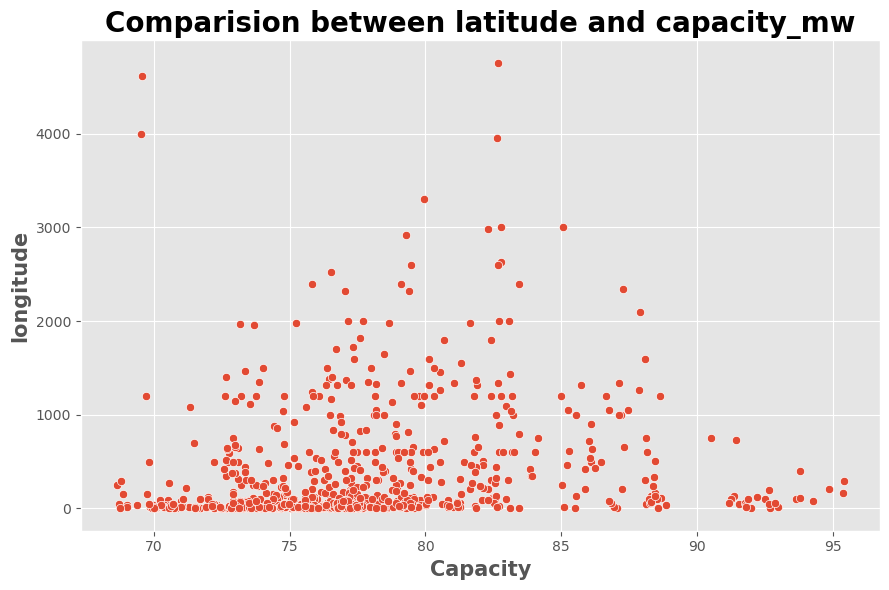

In [41]:
plt.figure(figsize=[9,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=20, fontweight='bold')
a= sns.scatterplot(x="longitude",y="capacity_mw",data=df)
a.set_xlabel('Capacity',fontsize=15,fontweight ='bold')
a.set_ylabel('longitude',fontsize=15,fontweight ='bold')
plt.show()

#### The current visualizations do not provide substantial new information.

### We should investigate the potential correlation between the age of a power plant and its electricity generation capacity. 

<Axes: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

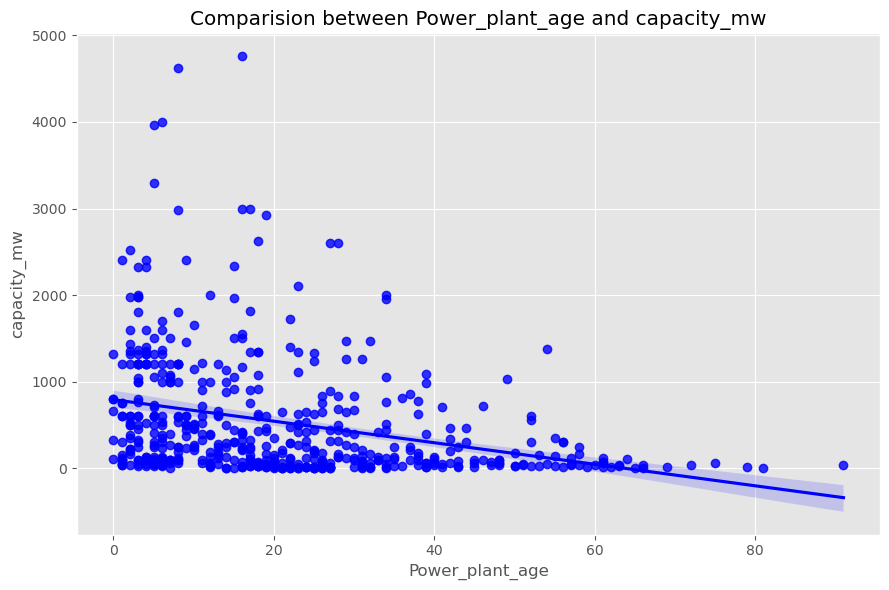

In [43]:
plt.figure(figsize=[9,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x='Power_plant_age',y='capacity_mw', data =df,color = "b")

#### The data reveals a negative linear relationship between power plant age and capacity. In other words, older plants tend to have a significantly lower electricity generation capacity compared to newer facilities.

### Lets check the relation between source and capacity_mw

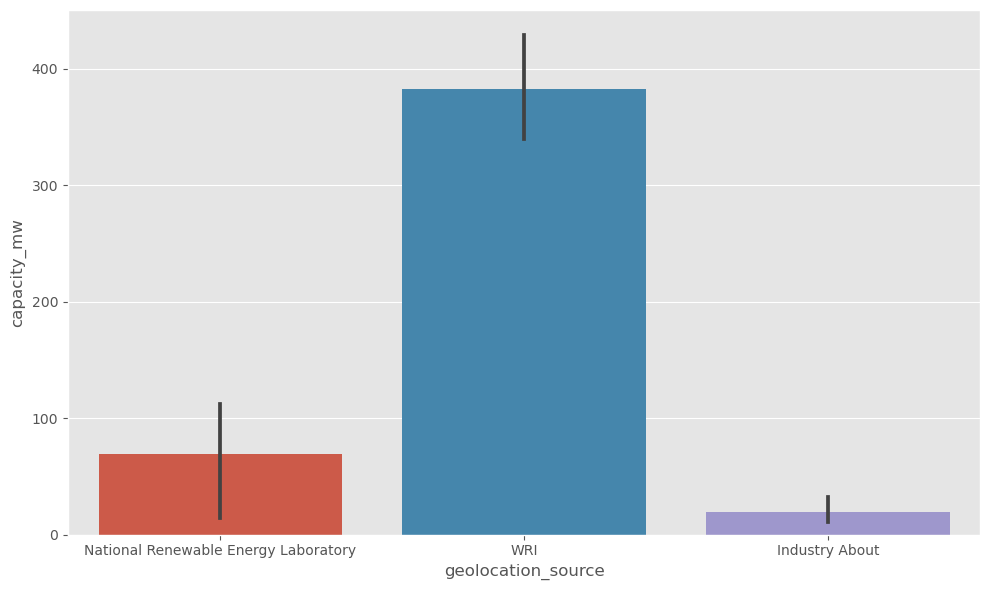

In [44]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

#### The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

### checking the how thw electricity genration vs capacity are related

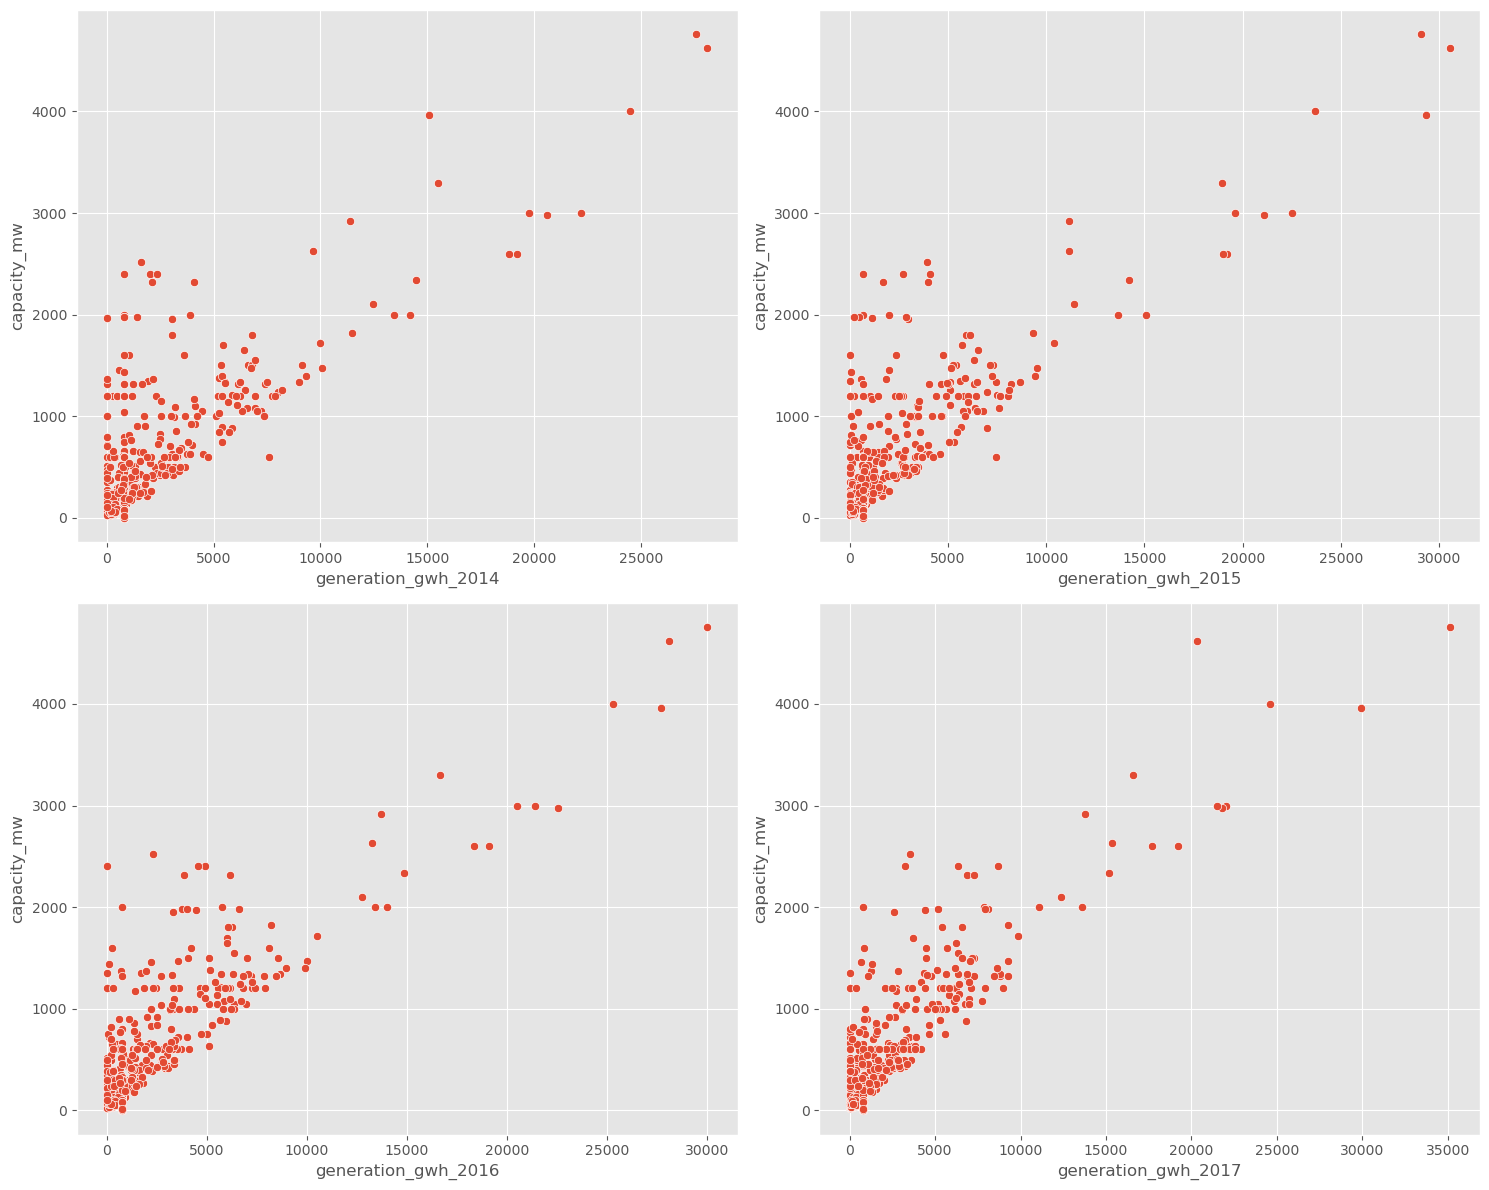

In [53]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df)
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df)
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df)
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df)
plt.show()

#### There is a positive correlation between the capacity and the electrical output for the years mentioned.  An examination of the data reveals that the electrical output for the years 2014,2015,2016,2017 have significant capacity of above 1000mw. Also the increase in electrical output is exceeding 5,000 gigawatt-hours in all the years.  This trend suggests a potential causal relationship between increased capacity and growth in electrical output.

lets see the distribution of numerical datasets

In [49]:
df=df.drop(columns='generation_gwh_2013',axis=1)
df=df.drop(columns='generation_gwh_2019',axis=1)

In [50]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

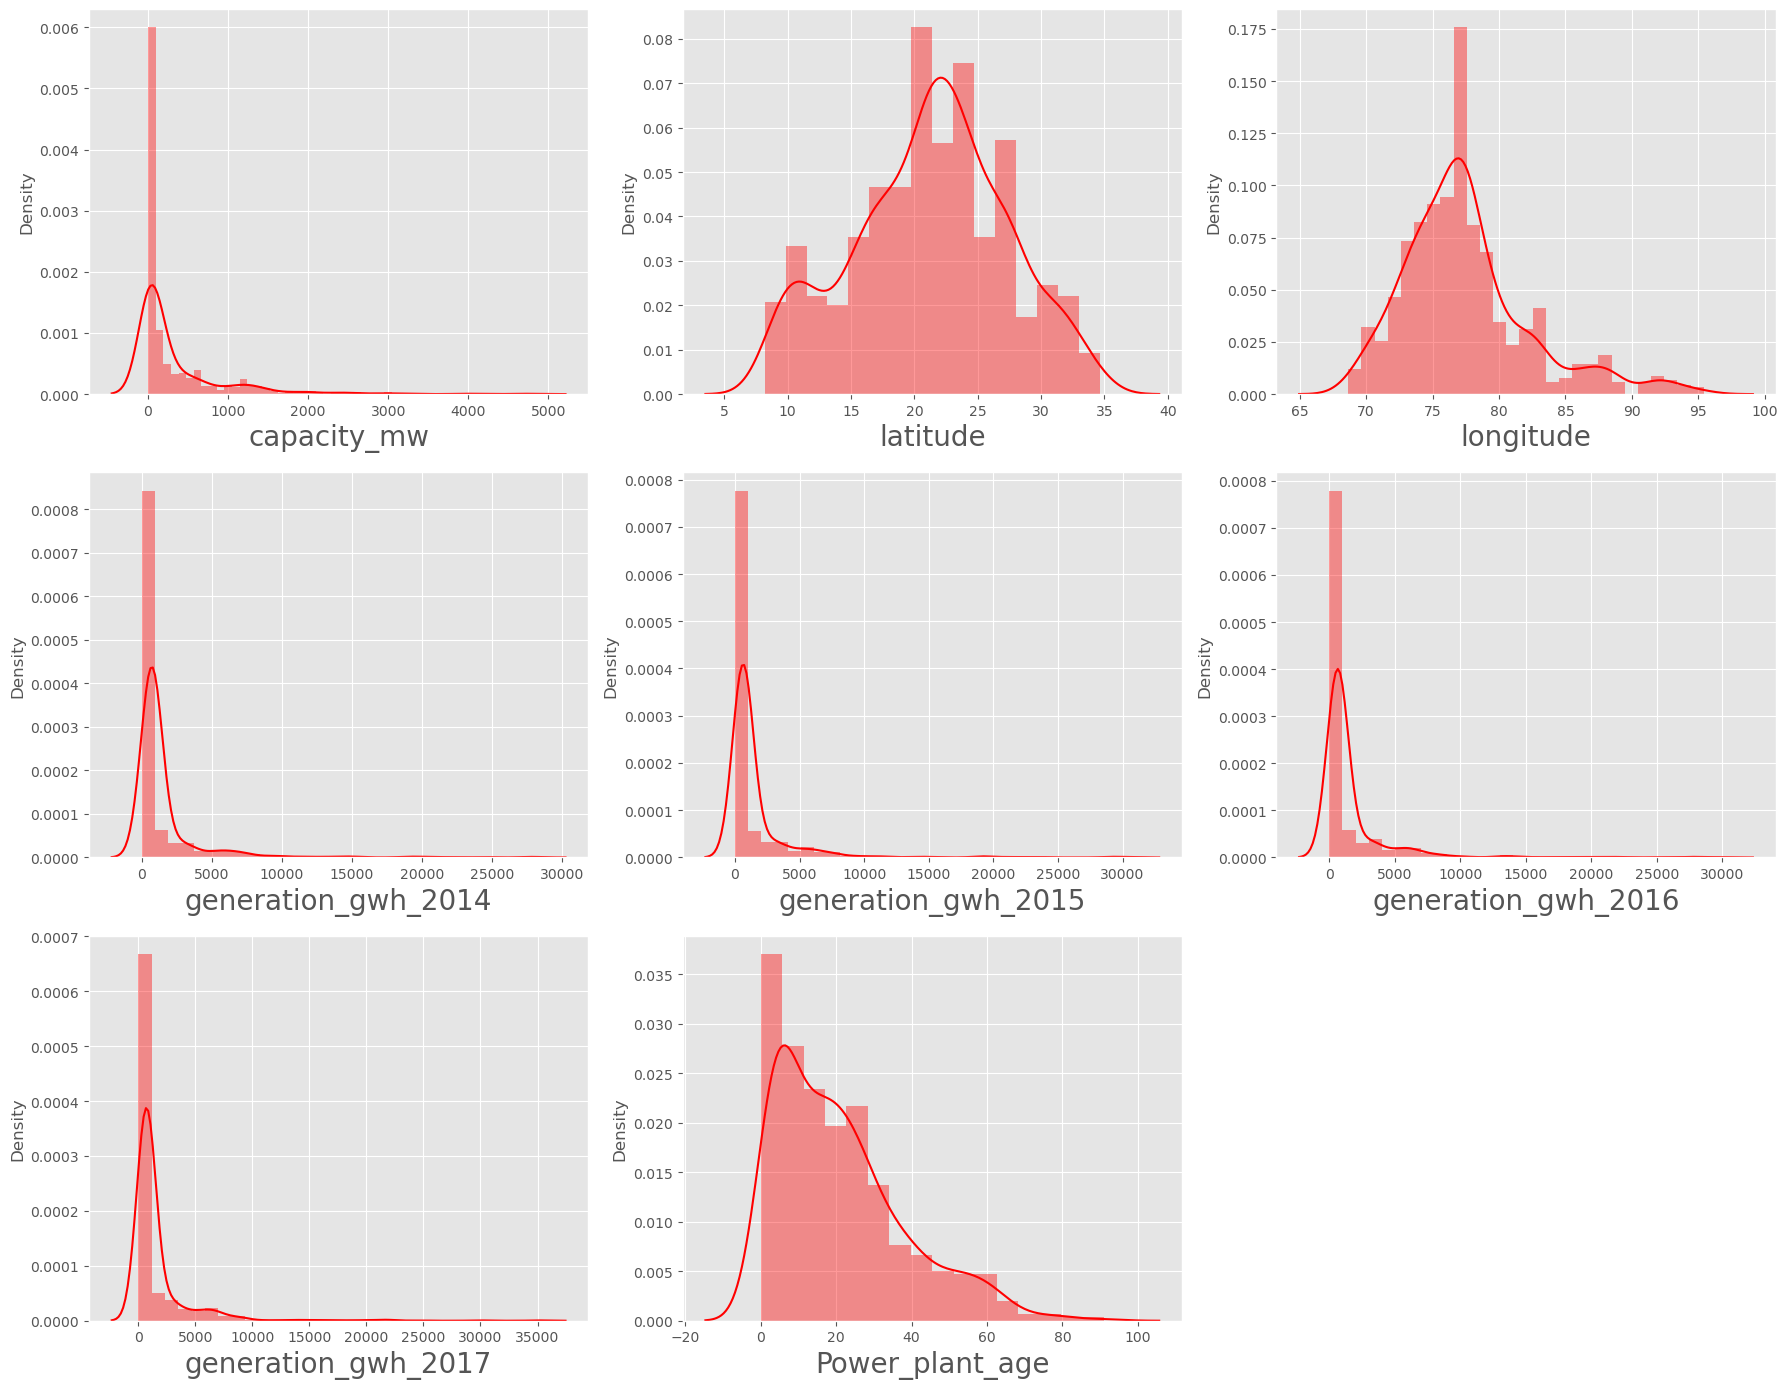

In [51]:
plt.figure(figsize=(18,14))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### An examination of the distribution plots discloses that the data exhibits a right skew in most features, with the mean exceeding the median. This suggests a non-normal distribution for these features, with the exception of latitude and longitude.  To normalize the data for further analysis, steps will be taken to address the skewness in the affected features, excluding the target variable.

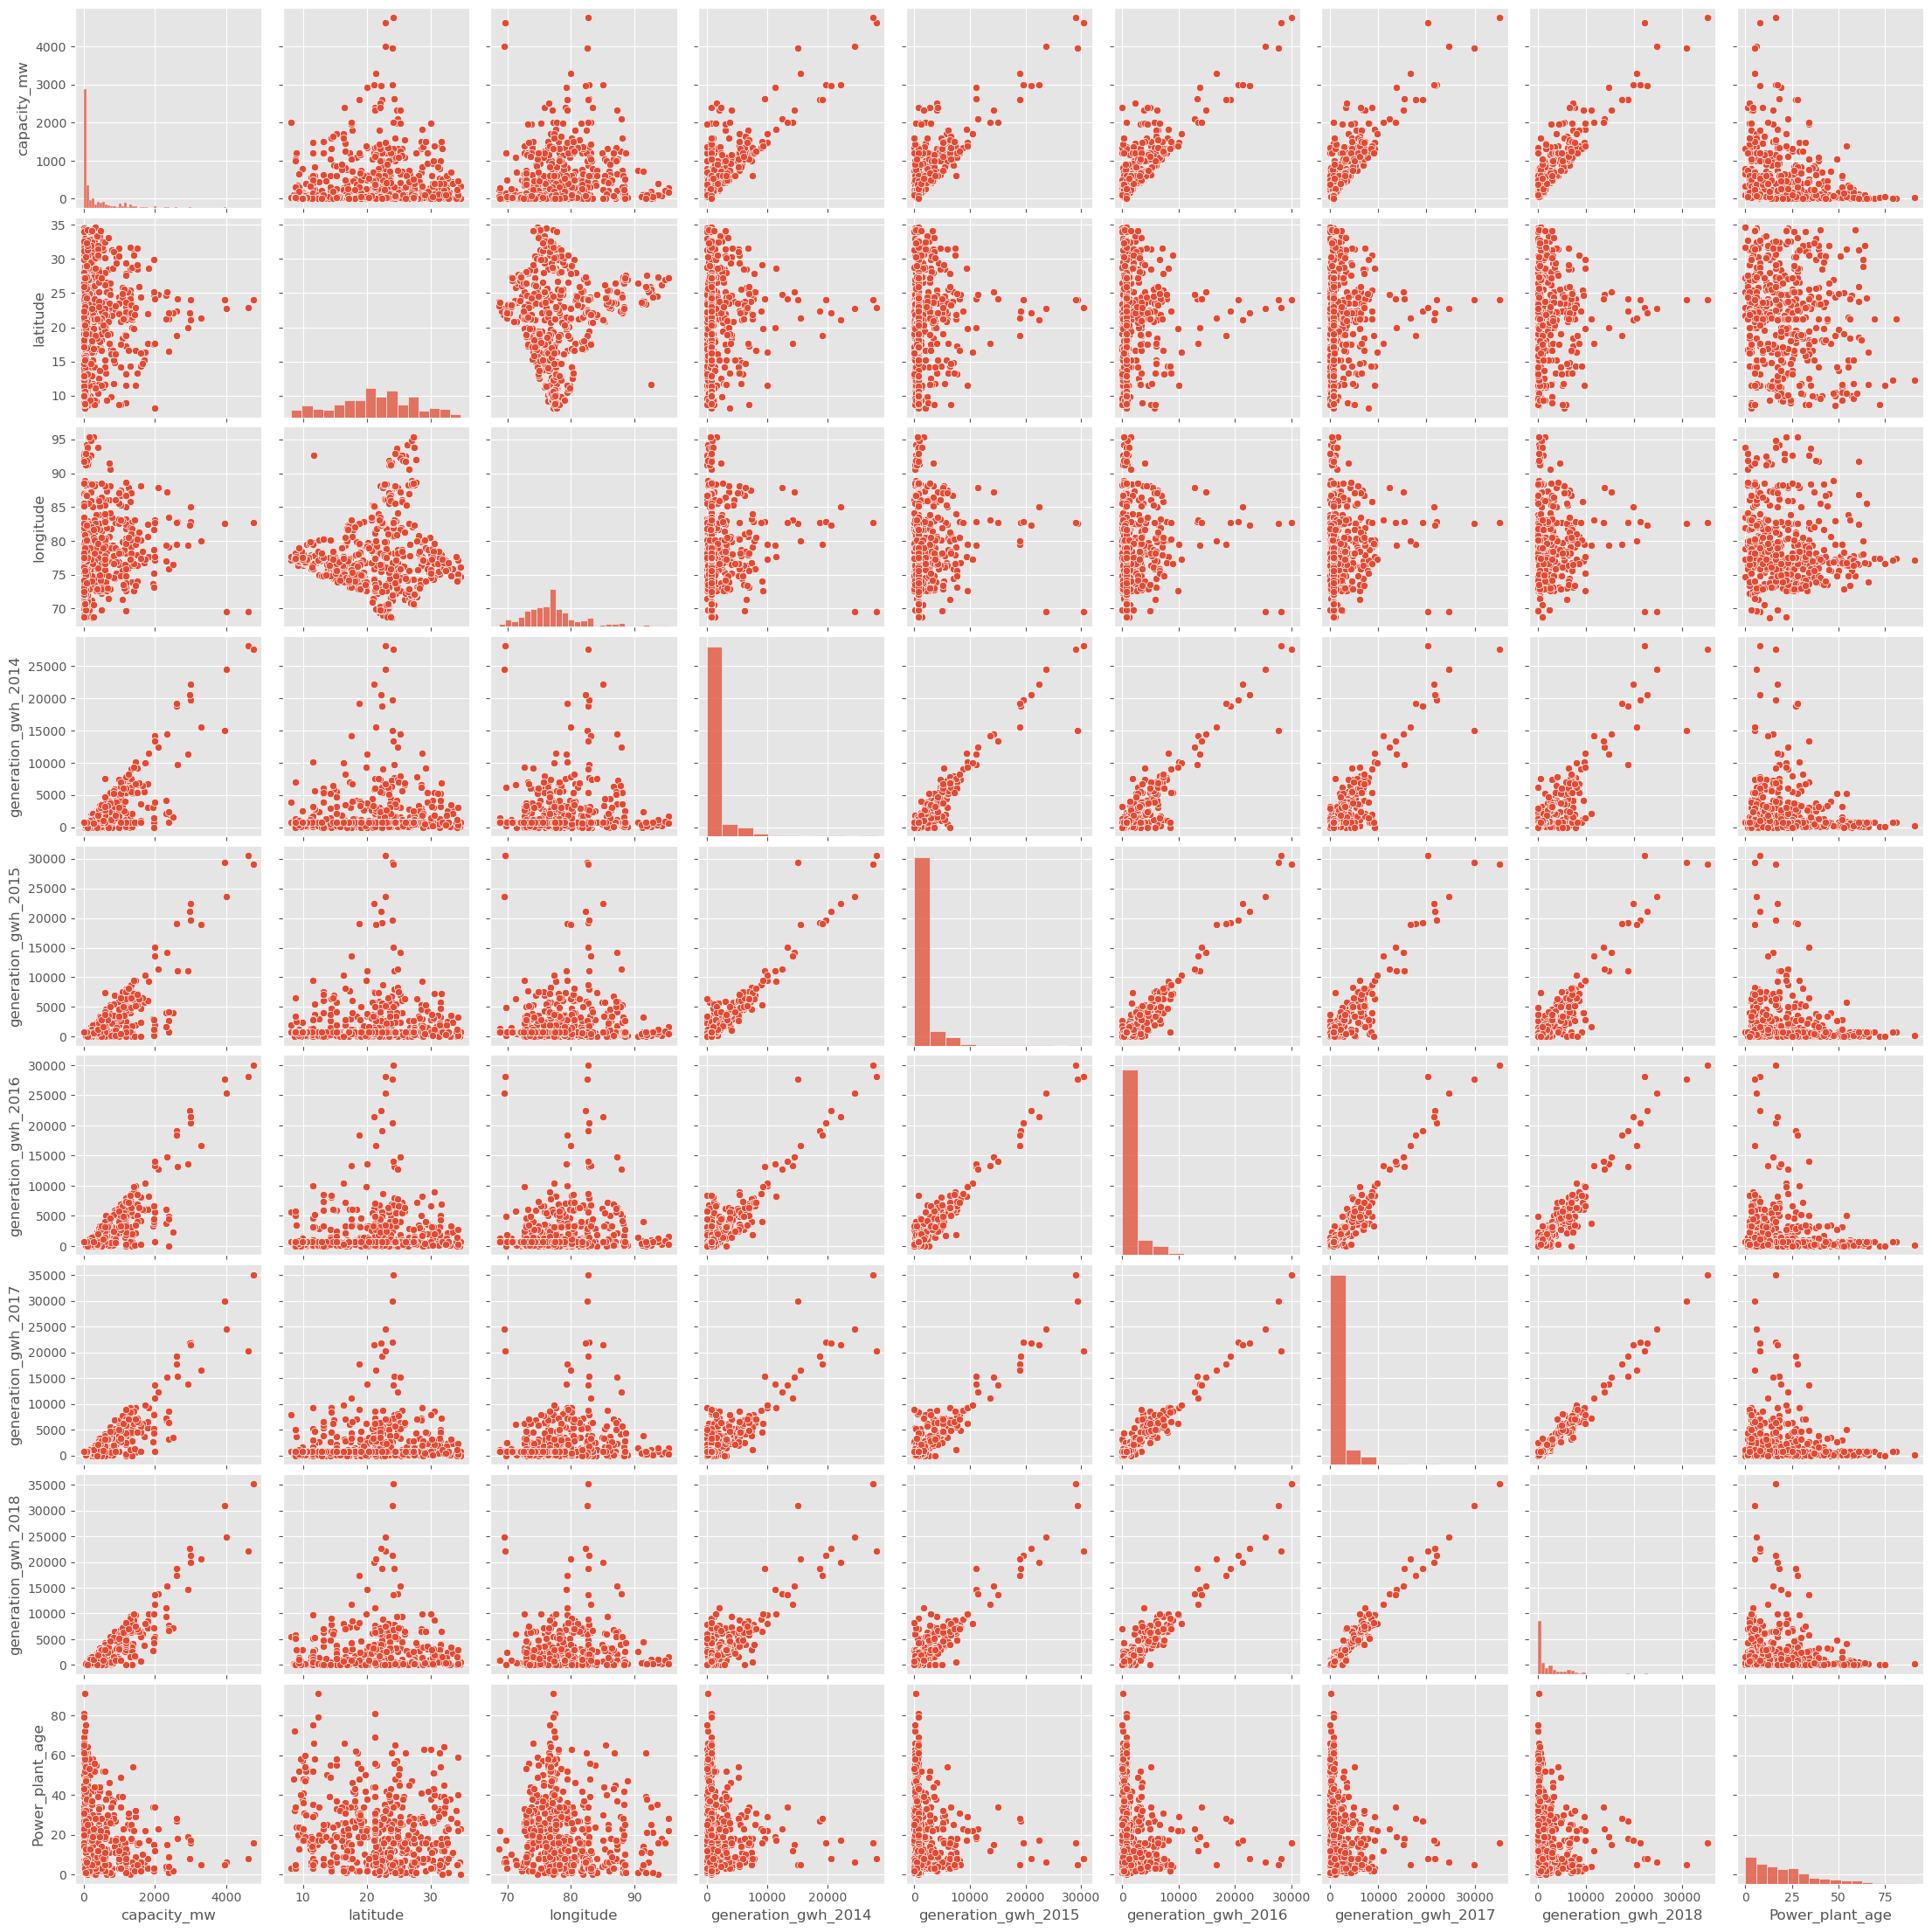

In [52]:
sns.pairplot(df)

#### An analysis of the features reveals a predominance of strong linear relationships and correlations amongst them.  The provided plots also depict the presence of outliers within certain feature distributions.  It's noteworthy that the diagonal elements of the plot likely represent histograms, which visually represent the distribution of data within each feature.

In [54]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [56]:
df.drop(columns=['name'],axis=1,inplace=True)

In [57]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

## Encoding categorical data

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,801.123775,711.181225,737.205450,817.977250,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,801.123775,711.181225,737.205450,817.977250,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,801.123775,711.181225,737.205450,817.977250,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


#### The categorical features have been successfully transformed into numerical representations using label encoding.

#### finding the outliers and removing it

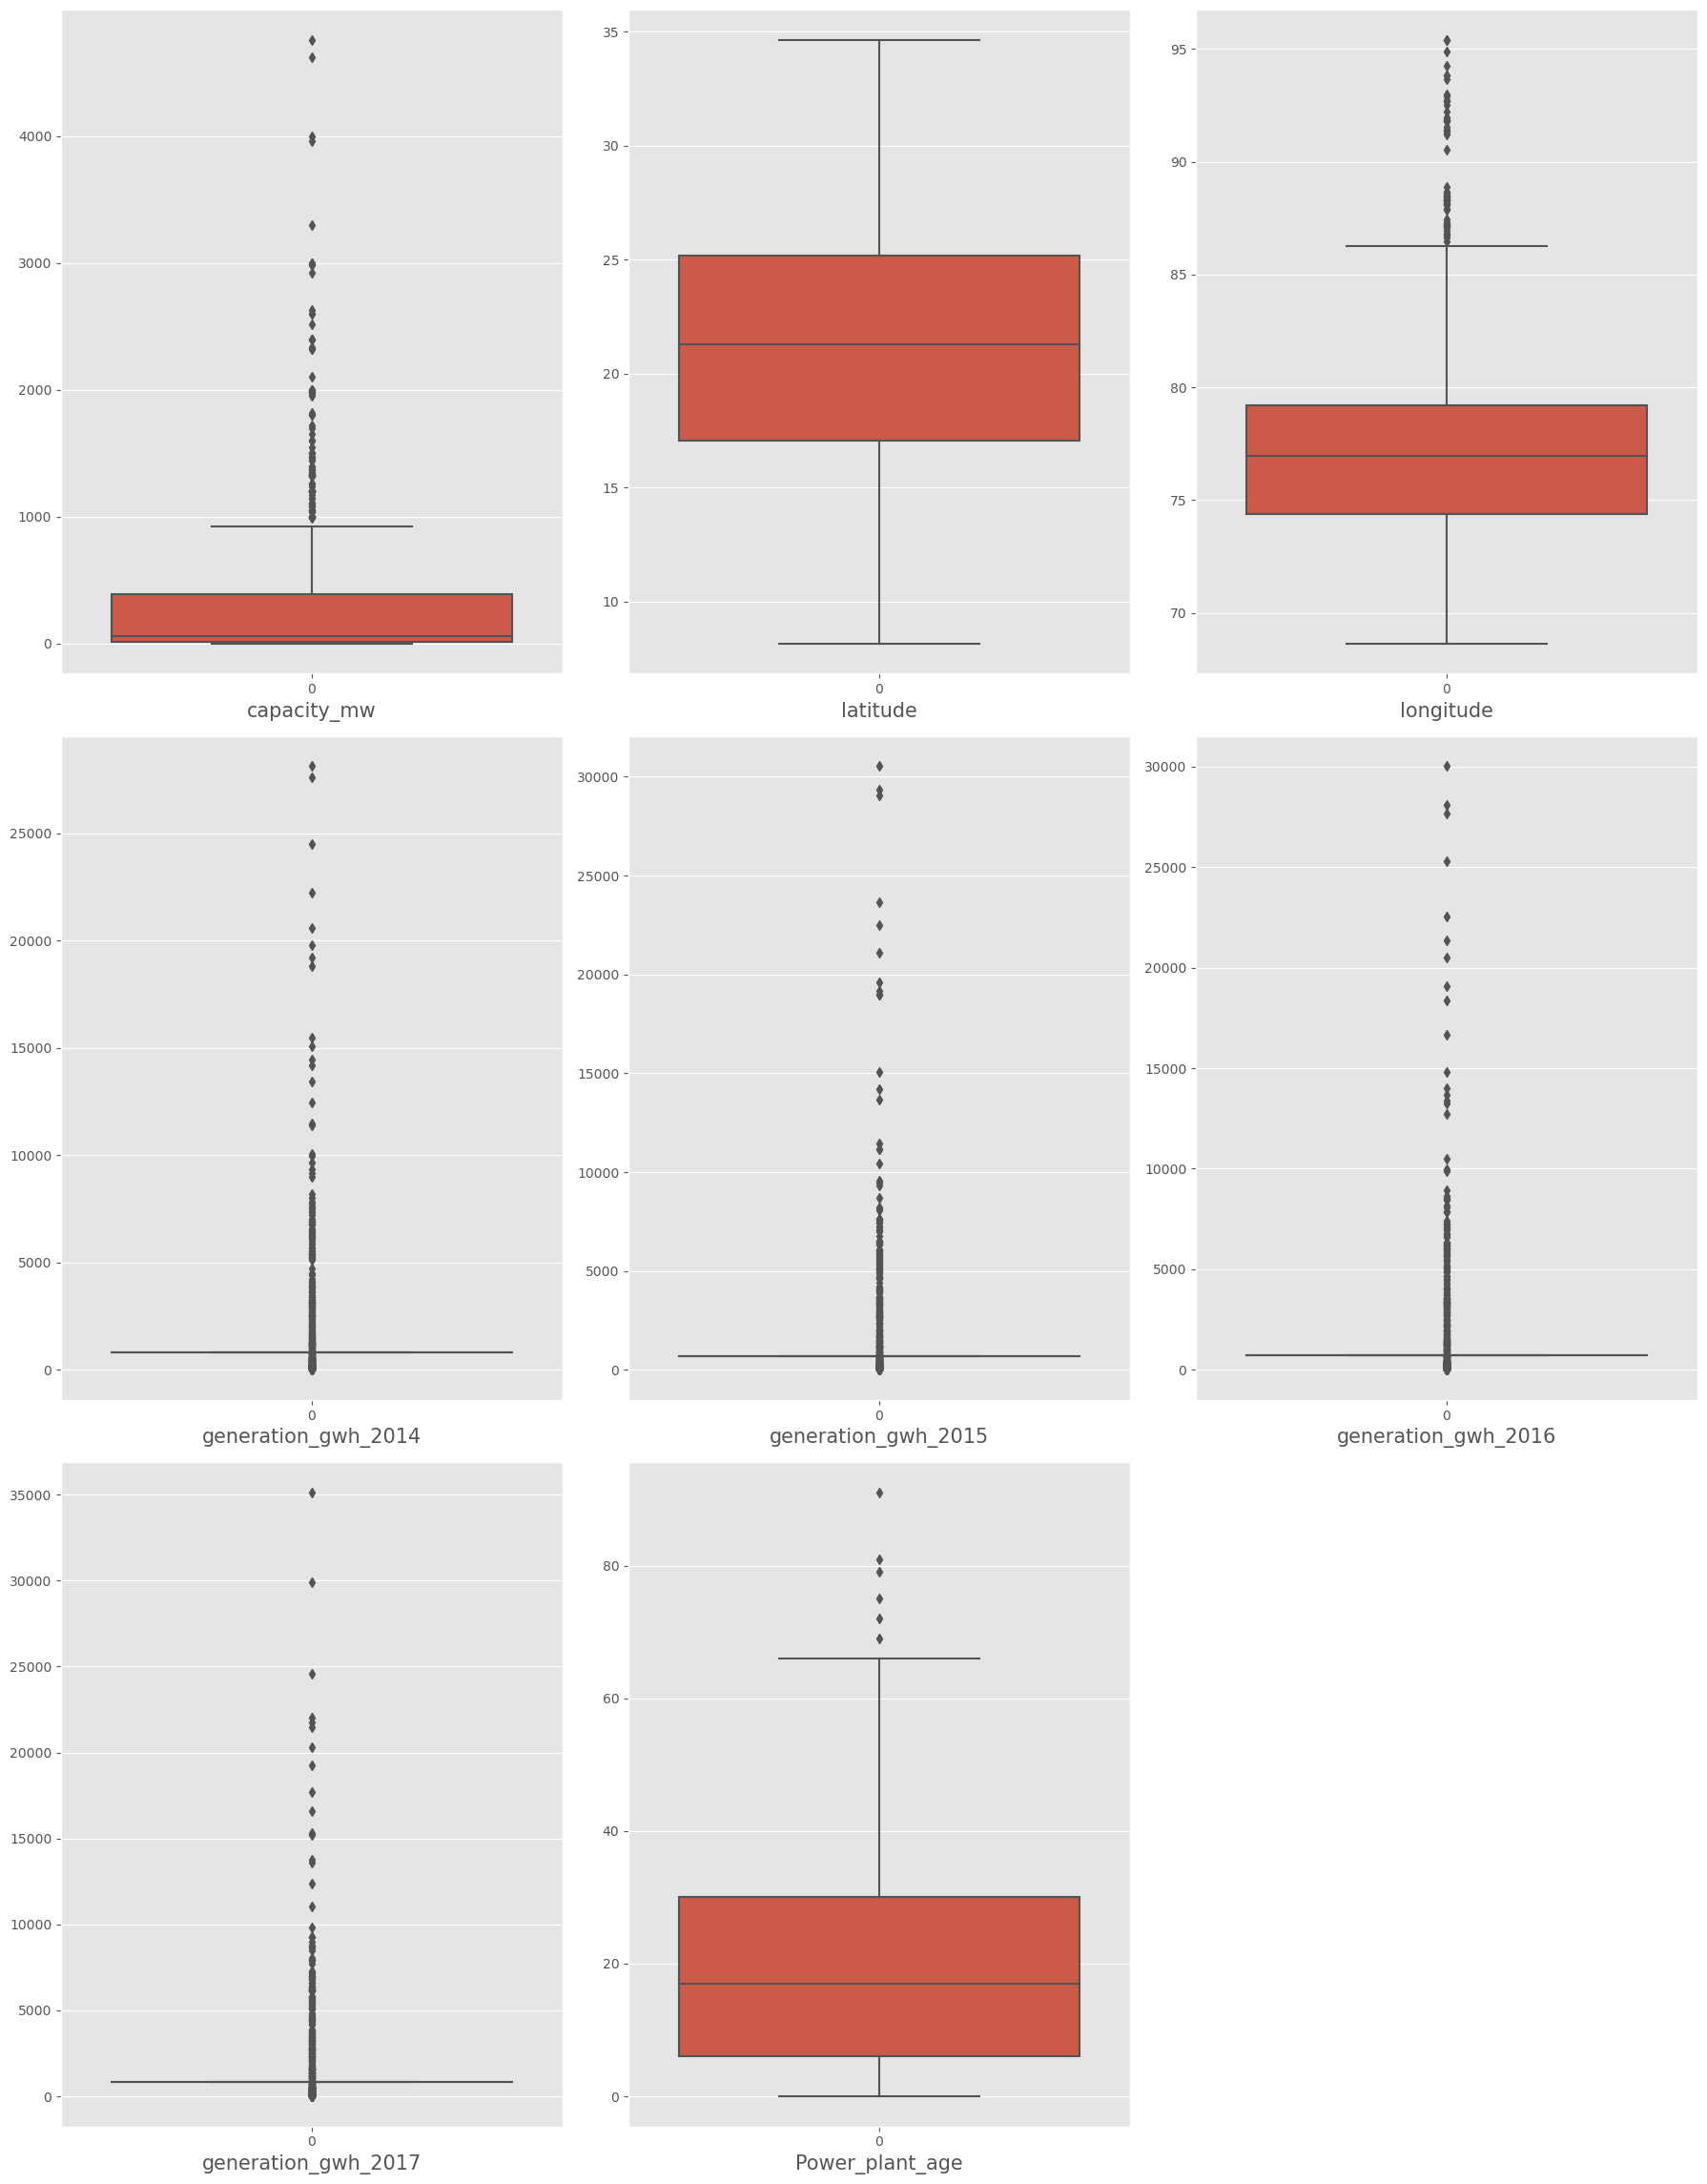

In [61]:
plt.figure(figsize=(18,23))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### The data exhibits outliers. Employing a lower capping level successfully removes these outliers. Therefore, we will proceed with the Quantile-based Flooring and Capping technique for further data treatment.

#### To address remaining outliers, a Quantile-based Flooring and Capping technique will be implemented. This technique employs established percentiles to constrain the data range. Specifically, values lower than the  nth (e.g., 10th) percentile will be set to the nth percentile value (flooring), while values exceeding the mth (e.g., 75th) percentile will be set to the mth percentile value (capping)

In [63]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [64]:
df2=df.copy

In [65]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2014    1856.927800
generation_gwh_2015    2298.962020
generation_gwh_2016    2435.205000
generation_gwh_2017    2622.083625
generation_gwh_2018    6014.952550
Power_plant_age          39.000000
dtype: float64


In [66]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(817, 11)


In [67]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


In [68]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.606289,0.793497,0.819676,0.853008,0.868338,0.901918,-0.304087
latitude,0.050984,1.000000,0.036362,-0.010204,-0.032790,0.058594,0.053869,0.047677,0.057897,0.041414,-0.124504
longitude,0.195882,0.036362,1.000000,-0.347948,-0.275689,0.104649,0.121513,0.143459,0.151712,0.050548,-0.115182
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.476410,-0.240656,-0.249304,-0.259708,-0.263599,-0.421518,0.336501
other_fuel1,-0.606289,-0.032790,-0.275689,0.476410,1.000000,-0.452187,-0.462248,-0.482445,-0.495103,-0.429803,0.359209
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,-0.452187,1.000000,0.963719,0.935067,0.904075,0.887050,-0.112889
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,-0.462248,0.963719,1.000000,0.973231,0.940229,0.927664,-0.147515
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,-0.482445,0.935067,0.973231,1.000000,0.973909,0.961997,-0.182283
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,-0.495103,0.904075,0.940229,0.973909,1.000000,0.985604,-0.195345
generation_gwh_2018,0.901918,0.041414,0.050548,-0.421518,-0.429803,0.887050,0.927664,0.961997,0.985604,1.000000,-0.193694


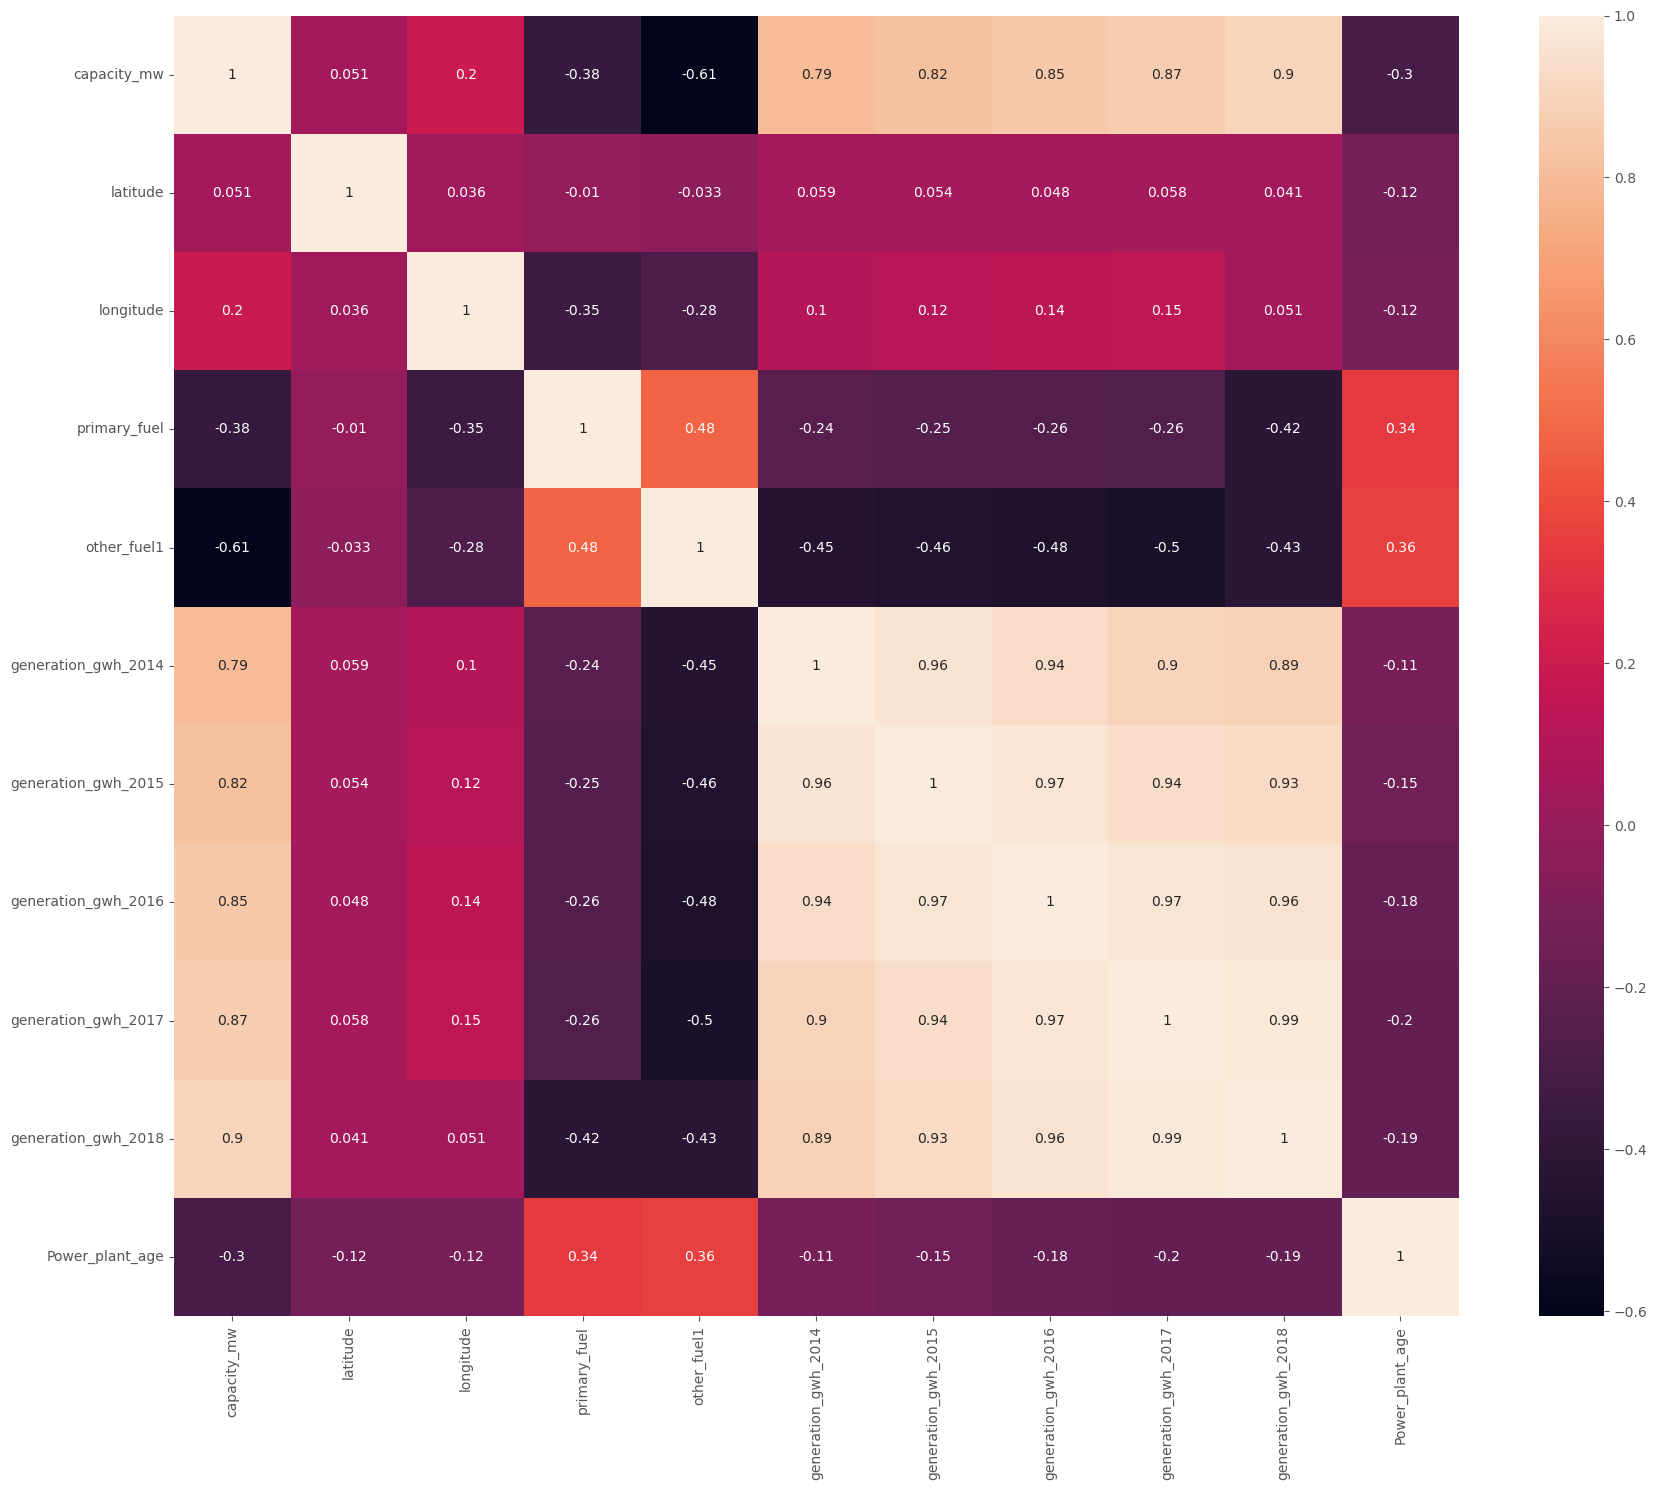

In [71]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### The target variable, capacity_mw, exhibits a strong positive correlation with features representing electricity generation in the years 2014, 2015, 2016, and 2017,2018.  Conversely, capacity_mw displays a negative correlation with features such as primary_fuel, source, and power_plant_age.

### For clear understaning of the corelation will will plot the barplot 

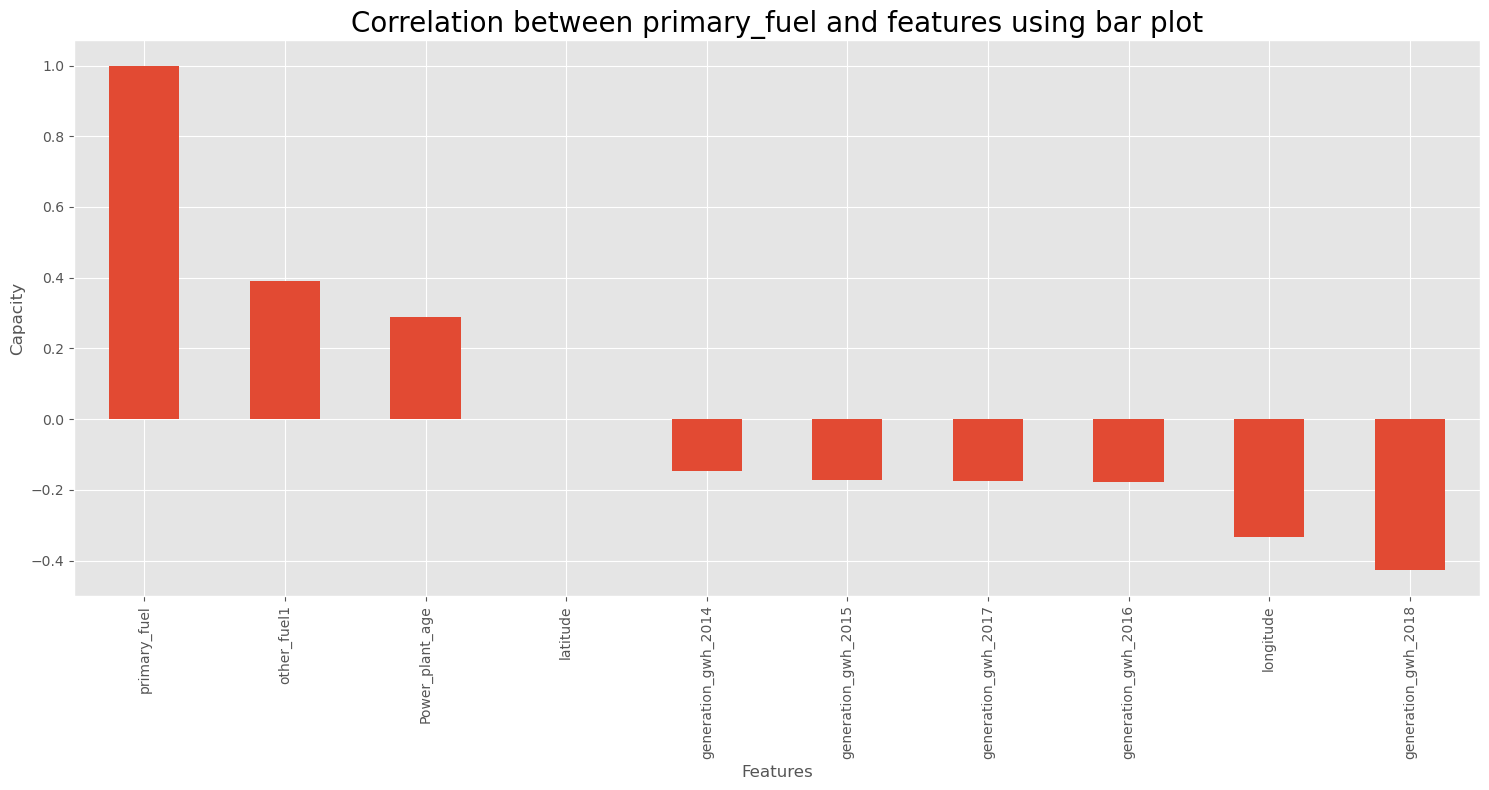

In [75]:
plt.figure(figsize=(15,8))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Capacity',fontsize=12)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

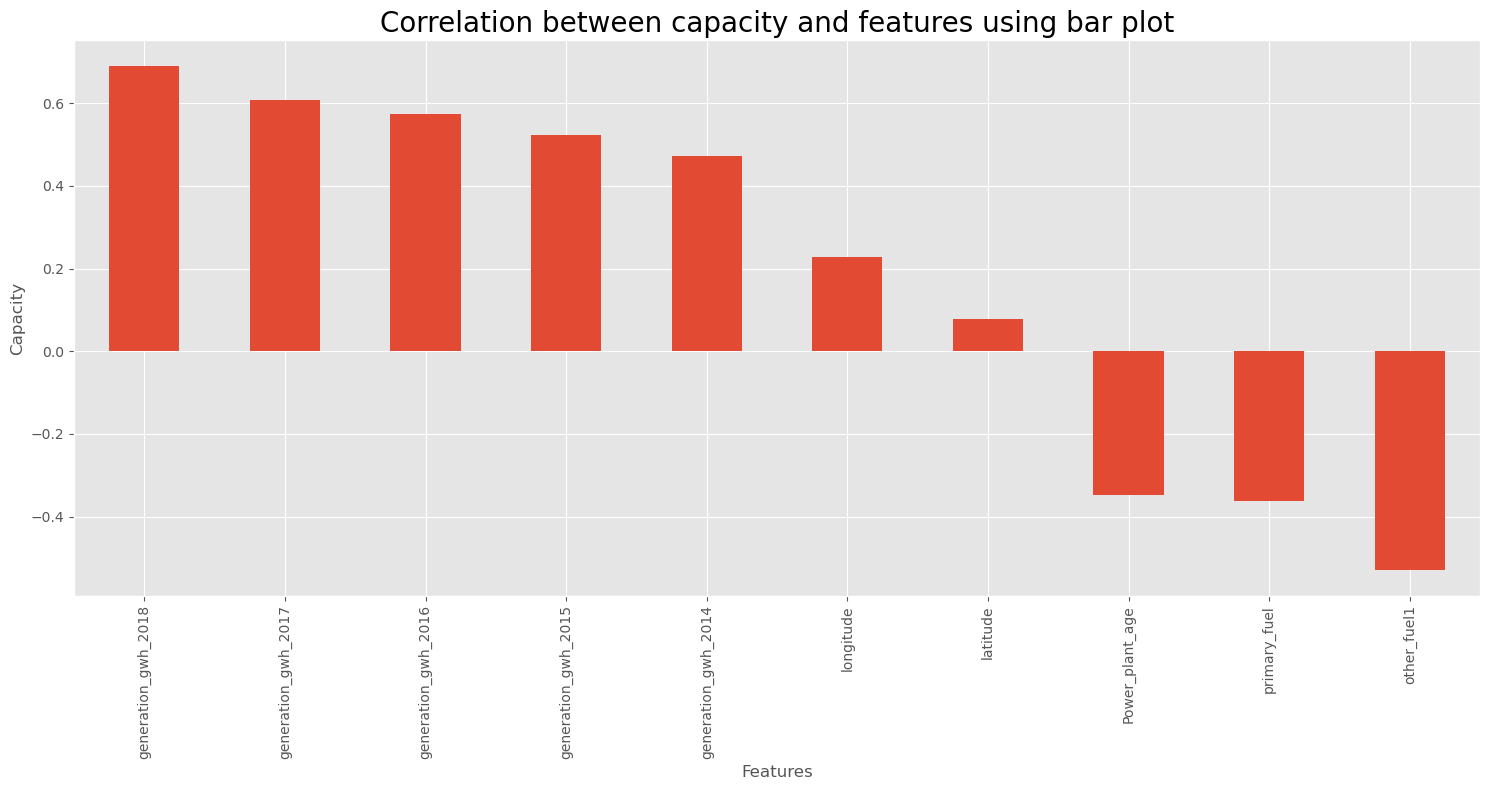

In [76]:
plt.figure(figsize=(15,8))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Capacity',fontsize=12)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

## Skewness

In [77]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
other_fuel1           -1.626786
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    3.476298
Power_plant_age        1.067949
dtype: float64

In [80]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [81]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.908858,0.410868,0.100147,0.101265,0.117166,0.135300,-0.842901
1,-0.490426,0.410868,0.100147,0.101265,0.117166,0.135300,NaN
2,-2.400967,0.410868,0.100147,0.101265,0.117166,0.135300,NaN
3,2.177891,0.410868,-0.211979,0.297429,0.326594,-0.083292,-0.240010
5,-2.744629,-2.433761,0.605848,0.756340,0.680311,0.531545,-0.312514


In [82]:
data.skew()

capacity_mw            2.393827
latitude              -0.126465
longitude             -0.003852
primary_fuel           0.324149
other_fuel1           -2.026726
generation_gwh_2014    0.169476
generation_gwh_2015    0.171098
generation_gwh_2016    0.144115
generation_gwh_2017    0.111397
generation_gwh_2018    1.694986
Power_plant_age       -0.091917
dtype: float64

In [83]:
data.drop("other_fuel1",axis=1,inplace=True)

#### Due to weak correlation with the target variable and a significant presence of missing values, the 'other fuel' feature will be excluded from further analysis

In [88]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [92]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,Power_plant_age
0,2.5,28.1839,-0.908858,6,-8.429006e-01
1,98.0,24.7663,-0.490426,1,5.110068e-16
2,39.2,21.9038,-2.400967,7,5.110068e-16
3,135.0,23.8712,2.177891,2,-2.400101e-01
5,250.0,23.7689,-2.744629,1,-3.125141e-01


## Standard Scaler

In [94]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [96]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (571, 4)
Training target vector size: (571,)
Test feature matrix size: (246, 4)
Test target vector size: (246,)


### Finding best Random state

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5650406504065041 on Random_state 909


## Decision Tree Classifier

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6300813008130082


Confusion matrix of DecisionTreeClassifier : 
 [[12  5  0  0  0  0  2  3]
 [ 2 33  6  9  0  3  2  4]
 [ 0  5  6  2  1  2  2  1]
 [ 0  9  4 48  0  0  4  1]
 [ 0  1  0  0  1  0  0  0]
 [ 0  1  2  4  0  0  0  0]
 [ 0  2  0  0  0  0 31  7]
 [ 2  2  0  0  0  0  3 24]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.57      0.56      0.56        59
           2       0.33      0.32      0.32        19
           3       0.76      0.73      0.74        66
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         7
           6       0.70      0.78      0.74        40
           7       0.60      0.77      0.68        31

    accuracy                           0.63       246
   macro avg       0.53      0.52      0.5

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7113821138211383


Confusion matrix of RandomForestClassifier : 
 [[16  3  0  0  0  0  2  1]
 [ 0 37  8  7  0  0  3  4]
 [ 0  0  9  6  0  2  0  2]
 [ 0  2  2 60  0  0  1  1]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  3  4  0  0  0  0]
 [ 0  4  0  0  0  0 30  6]
 [ 3  0  0  0  0  0  5 23]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.80      0.63      0.70        59
           2       0.39      0.47      0.43        19
           3       0.77      0.91      0.83        66
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       0.73      0.75      0.74        40
           7       0.62      0.74      0.68        31

    accuracy                           0.71       246
   macro avg       0.52      0.53      0.5

## Extra Trees Classifier

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7073170731707317


Confusion matrix of ExtraTreesClassifier : 
 [[13  5  0  0  0  0  3  1]
 [ 0 40  5  7  0  0  4  3]
 [ 0  2 10  3  0  2  1  1]
 [ 0  3  3 57  0  0  2  1]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  3  3  0  1  0  0]
 [ 2  2  0  0  0  0 29  7]
 [ 2  0  0  0  0  0  5 24]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.77      0.68      0.72        59
           2       0.45      0.53      0.49        19
           3       0.80      0.86      0.83        66
           4       0.00      0.00      0.00         2
           5       0.33      0.14      0.20         7
           6       0.66      0.72      0.69        40
           7       0.65      0.77      0.71        31

    accuracy                           0.71       246
   macro avg       0.55      0.54      0.54       

In [103]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('----------------------------------------------------------------------------------------------------------------')



Cross Validation Score LogisticRegression() :

Score : [0.53658537 0.46341463 0.48466258 0.47852761 0.47239264]
Mean Score : 0.4871165644171779
Std deviation : 0.02571198188104393


----------------------------------------------------------------------------------------------------------------


Cross Validation Score DecisionTreeClassifier() :

Score : [0.70121951 0.61585366 0.73619632 0.66257669 0.65644172]
Mean Score : 0.6744575789316174
Std deviation : 0.041056106557041214


----------------------------------------------------------------------------------------------------------------


Cross Validation Score RandomForestClassifier() :

Score : [0.75       0.7804878  0.79141104 0.71779141 0.75460123]
Mean Score : 0.7588582971719288
Std deviation : 0.02573168503063658


----------------------------------------------------------------------------------------------------------------


Cross Validation Score ExtraTreesClassifier() :

Score : [0.76829268 0.76829268 0.82822086 0.73006

#### An evaluation of various classification algorithms revealed that RandomForestClassifier achieved the highest accuracy, F1-score, and cross-validation score. Consequently, we will employ hyperparameter tuning to optimize the Random Forest model, which will subsequently be selected as the final model for prediction.

### Hyper Parameter Tuning : GridSearchCV

In [105]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [106]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.600 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.702 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.702 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.728 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.600 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.693 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [107]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 60}

## Final Model

In [108]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7032520325203252


In [112]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.892317 (macro),
0.913376 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.910221 (macro),
0.937442 (weighted by prevalence)


### Saving the model

In [113]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

## Machine Learning Model Building Regression

In [116]:
df2=df.copy()

In [117]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2014    1856.927800
generation_gwh_2015    2298.962020
generation_gwh_2016    2435.205000
generation_gwh_2017    2622.083625
generation_gwh_2018    6014.952550
Power_plant_age          39.000000
dtype: float64


In [118]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(817, 11)


In [119]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.908858,0.410868,0.100147,0.101265,0.117166,0.135300,-0.842901
1,-0.490426,0.410868,0.100147,0.101265,0.117166,0.135300,NaN
2,-2.400967,0.410868,0.100147,0.101265,0.117166,0.135300,NaN
3,2.177891,0.410868,-0.211979,0.297429,0.326594,-0.083292,-0.240010
5,-2.744629,-2.433761,0.605848,0.756340,0.680311,0.531545,-0.312514


In [120]:
data.drop("other_fuel1",axis=1,inplace=True)

In [121]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [122]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [129]:
data.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
generation_gwh_2018    458
Power_plant_age          0
dtype: int64

In [130]:
data.drop("generation_gwh_2018",axis=1,inplace=True)

### Standard Scaling

In [134]:
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [135]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (547, 4)
Training target vector size: (547,)
Test feature matrix size: (270, 4)
Test target vector size: (270,)


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.318814180854223 on Random_state 510


In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=510, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [  5.10946733 270.43755586 120.93731907  46.32219233  75.05160759
  99.86401592 240.20431929  46.32219233 204.38184924 -16.39392451
  15.3290956  447.36074249 295.43743803 287.98459725 131.88799849
 263.11619316 284.3060029  203.3987649  247.38822543 319.5412318
 346.15301308 342.25210961 313.13145298 493.20224934 517.005471
  65.95263621 404.27304655 296.85796891 162.0052697  266.86508687
  43.39421934  46.32219233 327.58974275  90.86874385 121.47715535
  92.44156056 449.13007956 391.06173332  13.65000466 170.51190831
 175.97212453 384.14219226  46.32219233 292.94228026 126.49971183
 284.83627797 174.00540865  41.00014224  20.84324032  64.19551702
  92.48091059  44.33331023 216.3478244  302.80534377 285.84820523
  89.80508487 310.66546002 355.77716901 192.99611379 312.460139
 298.79348952 285.13720117  84.79833239  -6.88383582  74.87867595
 118.69254669  68.50584825 174.62632331  28.48217491 239.83228515
 361.60721469 119.51846566 221.65909234  15.90809447 217.4329079

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 140.46676324211182
Mean squared error : 39521.57151297675
Root Mean Squared Error: 198.80033076676898


 R2 Score :
0.3354579093189241


In [145]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
model = [rf,rd,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('-----------------------------------------------------------------------------------------------------------------')



 Error of  RandomForestRegressor() :
Mean absolute error : 107.96967320583994
Mean squared error : 32678.216159525993
Root Mean Squared Error: 180.77117070906522


 R2 Score :
0.45052665531659986
-----------------------------------------------------------------------------------------------------------------


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 140.46694215918131
Mean squared error : 39521.59331366507
Root Mean Squared Error: 198.80038559737523


 R2 Score :
0.3354575427475951
-----------------------------------------------------------------------------------------------------------------


 Error of  DecisionTreeRegressor() :
Mean absolute error : 136.10867073170732
Mean squared error : 61154.68638380894
Root Mean Squared Error: 247.2947358594779


 R2 Score :
-0.0282957278431597
-----------------------------------------------------------------------------------------------------------------


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 

### Cross Validation 

In [146]:
model = [rf,rd,dtc,adb,gradb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('-----------------------------------------------------------------------------------------------------------')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.42840831001677415
-----------------------------------------------------------------------------------------------------------


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.21962564586927788
-----------------------------------------------------------------------------------------------------------


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.02076866595609921
-----------------------------------------------------------------------------------------------------------


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.3775055152164185
-----------------------------------------------------------------------------------------------------------


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.35955904019149193
-----------------------------------------------------------------------------------------------------------


In [156]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor()
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 107.35321250661522
Mean squared error : 32373.198481304105
Root Mean Squared Error: 179.92553593446402


 R2 Score of Final Model :
0.4556554262085596




### Saving the model

In [158]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']